In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import pandas as pd

plt.rcParams["font.family"] = 'serif'


from collections import Counter


## Fall 2021

In [19]:
T_e=7
all_covariates = pd.read_csv(f'../data/data_fa21/all_students_features_T_e={T_e}_finalized.csv', index_col = 0)

df_fa21 = all_covariates[['current_gender', 'academic_career','employee_id_hash','day_idx', 'week_idx','hd_notify_date','class_positivity', 'campus_positivity', 'infected_on_this_day']]
baseline_date = dt.datetime.strptime('2021-08-26', '%Y-%m-%d').toordinal()
df_fa21['day_idx'] = df_fa21['day_idx'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').toordinal() - baseline_date)


c:\Program Files\Python37\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


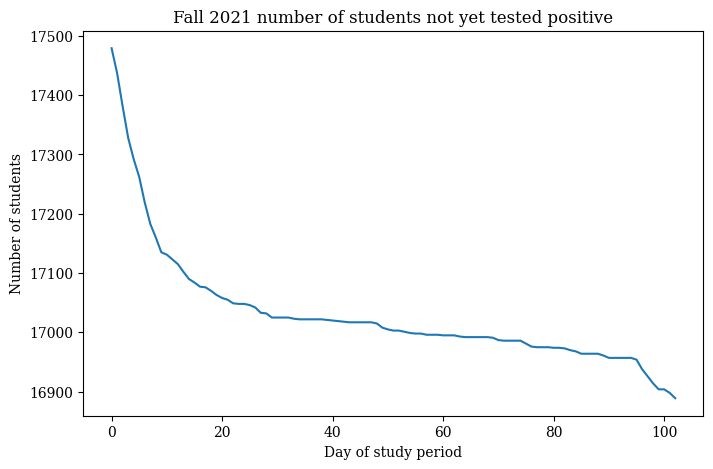

In [21]:
survival_lengths = df_fa21.groupby("employee_id_hash")["day_idx"].max().values
survival_lengths.sort()

counts = Counter(survival_lengths)

num_survivals = [df_fa21["employee_id_hash"].nunique()]

for days, n in counts.items():
    if days > len(num_survivals):
        num_survivals += [num_survivals[-1]]*(days-len(num_survivals))
    num_survivals.append(num_survivals[-1]-n)

fig, ax = plt.subplots(figsize = (8, 5))


plt.plot(num_survivals[:-1])
plt.title("Fall 2021 number of students not yet tested positive")
plt.xlabel("Day of study period")
plt.ylabel("Number of students")

plt.savefig("../plots/empirical_survival_curve_fa21.pdf")

## Spring 2022

In [14]:
T_e=7
all_covariates = pd.read_csv(f'../data/data_sp22/all_students_features_T_e={T_e}_finalized.csv', index_col = 0)

df_sp22 = all_covariates[['current_gender', 'academic_career','employee_id_hash','day_idx', 'week_idx','hd_notify_date','class_positivity', 'campus_positivity', 'infected_on_this_day']]
baseline_date = dt.datetime.strptime('2022-02-07', '%Y-%m-%d').toordinal()
df_sp22['day_idx'] = df_sp22['day_idx'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').toordinal() - baseline_date)


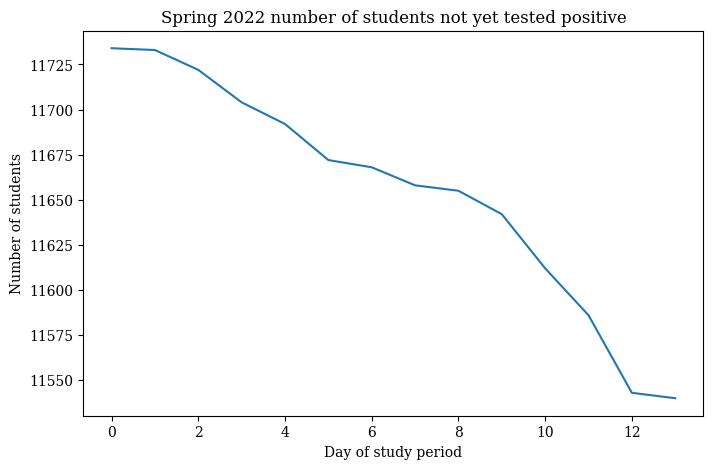

In [18]:


survival_lengths = df_sp22.groupby("employee_id_hash")["day_idx"].max().values
survival_lengths.sort()

counts = Counter(survival_lengths)

num_survivals = [df_sp22["employee_id_hash"].nunique()]

for days, n in counts.items():
    if days > len(num_survivals):
        num_survivals += [num_survivals[-1]]*(days-len(num_survivals))
    num_survivals.append(num_survivals[-1]-n)

fig, ax = plt.subplots(figsize = (8, 5))


plt.plot(num_survivals[:-1])
plt.title("Spring 2022 number of students not yet tested positive")
plt.xlabel("Day of study period")
plt.ylabel("Number of students")

plt.savefig("../plots/empirical_survival_curve_sp22.pdf")